In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shutil
from pathlib import Path

In [2]:
# Load cross-section data
cross_data = pd.read_csv('oasis_cross-sectional.csv')
cross_data

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
431,OAS1_0285_MR2,M,R,20,NaN,NaN,NaN,NaN,1469,0.847,1.195,2.0
432,OAS1_0353_MR2,M,R,22,NaN,NaN,NaN,NaN,1684,0.790,1.042,40.0
433,OAS1_0368_MR2,M,R,22,NaN,NaN,NaN,NaN,1580,0.856,1.111,89.0
434,OAS1_0379_MR2,F,R,20,NaN,NaN,NaN,NaN,1262,0.861,1.390,2.0


In [3]:
# Get the list of classes
main_dir = 'archive/Data'  
classes = os.listdir(main_dir)

# Label
label = []

# Flag for checked file
checked = []

for sub_dir in classes:
    sub_dir_path = os.path.join(main_dir, sub_dir)
    files = os.listdir(sub_dir_path)
    
    for file in files:
        file_id = file.split('_mpr')[0]
        if file_id not in checked and file_id in cross_data['ID'].values:
            label.append(sub_dir)
            checked.append(file_id)

In [4]:
# Merge the Class with the cross-sectional data based on the ID. If the ID is not in the checked list, then the Class is set to None.
new_cross_data = cross_data.copy()
new_cross_data.loc[:, 'Class'] = None
new_cross_data.loc[new_cross_data['ID'].isin(checked), 'Class'] = label

new_cross_data

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay,Class
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN,Mild Dementia
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN,Mild Dementia
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN,Mild Dementia
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN,Mild Dementia
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN,Mild Dementia
...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,OAS1_0285_MR2,M,R,20,NaN,NaN,NaN,NaN,1469,0.847,1.195,2.0,Very mild Dementia
432,OAS1_0353_MR2,M,R,22,NaN,NaN,NaN,NaN,1684,0.790,1.042,40.0,Very mild Dementia
433,OAS1_0368_MR2,M,R,22,NaN,NaN,NaN,NaN,1580,0.856,1.111,89.0,Very mild Dementia
434,OAS1_0379_MR2,F,R,20,NaN,NaN,NaN,NaN,1262,0.861,1.390,2.0,Very mild Dementia


In [5]:
# Drop the rows with based on label being None
for i in range(len(new_cross_data)):
    if new_cross_data['Class'][i] is None:
        new_cross_data = new_cross_data.drop(i)

In [6]:
new_cross_data

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay,Class
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN,Mild Dementia
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN,Mild Dementia
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN,Mild Dementia
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN,Mild Dementia
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN,Mild Dementia
...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,OAS1_0249_MR2,F,R,28,NaN,NaN,NaN,NaN,1215,0.865,1.444,3.0,Very mild Dementia
431,OAS1_0285_MR2,M,R,20,NaN,NaN,NaN,NaN,1469,0.847,1.195,2.0,Very mild Dementia
432,OAS1_0353_MR2,M,R,22,NaN,NaN,NaN,NaN,1684,0.790,1.042,40.0,Very mild Dementia
433,OAS1_0368_MR2,M,R,22,NaN,NaN,NaN,NaN,1580,0.856,1.111,89.0,Very mild Dementia


In [7]:
# Print the number of samples in each class
new_cross_data['Class'].value_counts()

Class
Non Demented          285
Very mild Dementia     58
Mild Dementia          21
Moderate Dementia       2
Name: count, dtype: int64

In [8]:
# Add new diagnosis column for Dementia/Non-Dementia
new_cross_data.loc[:, 'Diagnosis'] = new_cross_data['Class']
new_cross_data.loc[new_cross_data['Diagnosis'] == 'Mild Dementia', 'Diagnosis'] = 'Dementia'
new_cross_data.loc[new_cross_data['Diagnosis'] == 'Moderate Dementia', 'Diagnosis'] = 'Dementia'
new_cross_data.loc[new_cross_data['Diagnosis'] == 'Very mild Dementia', 'Diagnosis'] = 'Dementia'
new_cross_data.loc[new_cross_data['Diagnosis'] == 'Non Demented', 'Diagnosis'] = 'Not Dementia'

In [9]:
new_cross_data

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay,Class,Diagnosis
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN,Mild Dementia,Dementia
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN,Mild Dementia,Dementia
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN,Mild Dementia,Dementia
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN,Mild Dementia,Dementia
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN,Mild Dementia,Dementia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,OAS1_0249_MR2,F,R,28,NaN,NaN,NaN,NaN,1215,0.865,1.444,3.0,Very mild Dementia,Dementia
431,OAS1_0285_MR2,M,R,20,NaN,NaN,NaN,NaN,1469,0.847,1.195,2.0,Very mild Dementia,Dementia
432,OAS1_0353_MR2,M,R,22,NaN,NaN,NaN,NaN,1684,0.790,1.042,40.0,Very mild Dementia,Dementia
433,OAS1_0368_MR2,M,R,22,NaN,NaN,NaN,NaN,1580,0.856,1.111,89.0,Very mild Dementia,Dementia


In [10]:
# Print the number of samples in each class of the new diagnosis column
new_cross_data['Diagnosis'].value_counts()

Diagnosis
Not Dementia    285
Dementia         81
Name: count, dtype: int64

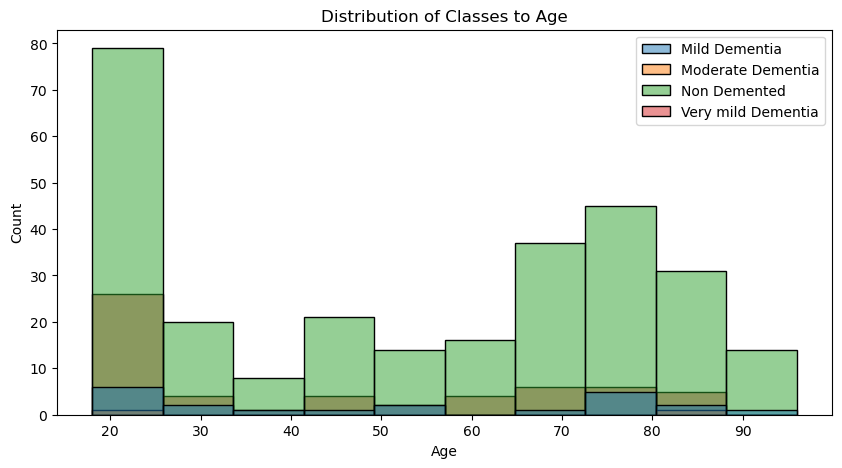

In [11]:
# Plot the distribution of the classes to age
plt.figure(figsize=(10, 5))
sns.histplot(x='Age', hue=label, data=new_cross_data)
plt.title('Distribution of Classes to Age')
plt.show()

In [12]:
# Reduce the number of classes to Dementia and Not Dementia to 81 each
dementia_data = new_cross_data[new_cross_data['Diagnosis'] == 'Dementia']
not_dementia_data = new_cross_data[new_cross_data['Diagnosis'] == 'Not Dementia']

dementia_data = dementia_data.sample(n=81, random_state=42)
not_dementia_data = not_dementia_data.sample(n=81, random_state=42)

prep_cross_data = pd.concat([dementia_data, not_dementia_data])
prep_cross_data.sort_values(by='ID', inplace=True)
prep_cross_data.drop_duplicates(subset='ID', keep='first', inplace=True)
prep_cross_data.reset_index(drop=True, inplace=True)

prep_cross_data

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay,Class,Diagnosis
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN,Mild Dementia,Dementia
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN,Mild Dementia,Dementia
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN,Mild Dementia,Dementia
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN,Mild Dementia,Dementia
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN,Mild Dementia,Dementia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,OAS1_0379_MR1,F,R,20,NaN,NaN,NaN,NaN,1255,0.866,1.398,NaN,Very mild Dementia,Dementia
158,OAS1_0379_MR2,F,R,20,NaN,NaN,NaN,NaN,1262,0.861,1.390,2.0,Very mild Dementia,Dementia
159,OAS1_0380_MR1,F,R,83,1.0,5.0,18.0,0.5,1313,0.705,1.337,NaN,Very mild Dementia,Dementia
160,OAS1_0381_MR1,M,R,59,4.0,2.0,29.0,0.0,1795,0.809,0.978,NaN,Very mild Dementia,Dementia


In [17]:
new_dir = Path("dataset_preprocessed")
new_dir.mkdir(exist_ok=True)

# In that directory, create two subdirectories: Dementia and Not Dementia.
(new_dir / "Dementia").mkdir(exist_ok=True)
(new_dir / "Not Dementia").mkdir(exist_ok=True)

# Prepare the preprocessed dataset directory
for sub_dir in classes:
    sub_dir_path = os.path.join(main_dir, sub_dir)
    files = os.listdir(sub_dir_path)

    for file in files:
        file_id = file.split("_mpr")[0]
        # Check if the file ID is in the preprocessed cross-sectional data
        if file_id not in prep_cross_data["ID"].values:
            continue
        
        # Copy the file to the new directory based on the diagnosis
        if prep_cross_data[prep_cross_data["ID"] == file_id]["Diagnosis"].item() == "Dementia":
            shutil.copy(os.path.join(sub_dir_path, file), os.path.join(new_dir, "Dementia", file))
        else:
            shutil.copy(os.path.join(sub_dir_path, file), os.path.join(new_dir, "Not Dementia", file))